In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

La fonction **make_blobs** permet de générer un dataset pour tester notre modèle, en indiquant le nombre de features, le nombre de centroids si le modèle que l'on va utiliser est un modèle de clusterisation par exemple.
Cette fonction nous renvoit ainsi les échantillons et leur prédiction associée.

Pour entaîner notre réseau de neurones artificiel, on décide d'utiliser l'apprentissage supervisé (comme l'indiquer la présence des labels associés aux échantillons).

In [20]:
X,y=make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

On réadapte la taille de la matrice y pour qu'il soit possible de l'utiliser dans les calculs matriciels effectués après.

In [22]:
print(X)
y=y.reshape(y.shape[0], 1)

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]
 [ 0.62835793  4.4601363 ]
 [ 1.68608568  0.65828448]
 [ 1.18454506  5.28042636]
 [ 0.06897171  4.35573272]
 [ 1.78726415  1.70012006]
 [ 4.4384123   1.84214315]
 [ 3.18190344 -0.18226785]
 [ 0.30380963  3.94423417]
 [ 0.73936011  0.43607906]
 [ 1.28535145  1.43691285]
 [ 1.1312175   4.68194985]
 [ 0.66471755  4.35995267]
 [ 1.31570453  2.44067826]
 [-0.18887976  5.20461381]
 [ 2.57854418  0.72611733]
 [ 0.87305123  4.71438583]
 [ 1.3105127   0.07122512]
 [ 0.9867701   6.08965782]
 [ 1.42013331  4.63746165]
 [ 2.3535057   2.22404956]
 [ 2.43169305 -0.20173713]
 [ 1.0427873   4.60625923]
 [ 0.95088418  0.94982874]
 [ 2.45127423 -0.19539785]
 [ 1.62011397  2.74692739]
 [ 2.15504965  4.12386249]
 [ 1.38093486  0.92949422]
 

In [4]:
print(X.shape)

(100, 2)


In [5]:
print(y.shape)

(100, 1)


On affiche graphiquement les deux clusters dans un nuage de point.

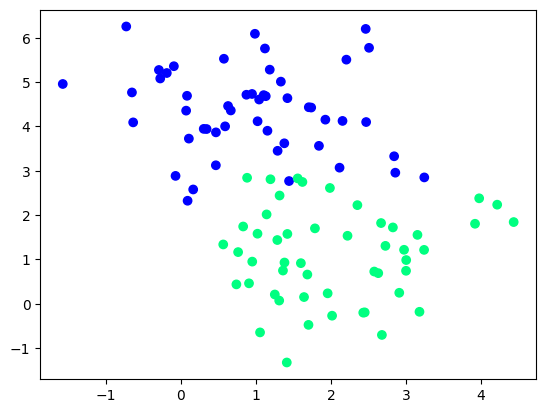

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.show()

La fonction **initialisation** permet d'initialiser le poid et le biais, variables qui jouent un rôle important lors de la transmission de données X d'un neurone à un autre.

- Chaque connexion entre neurone, appelée synapse a un **poid** et indique l'importante des données calculées, modifiées par un neurone vers un autre neurone. Les données d'un synapse peuvent avoir moins de poids que les données provenant d'un autre synapse. Dans notre cas, nous avons seulement 1 neurone, donc 1 seul synapse et W sera un vecteur de dimension (2,1).

- Le **biais** est un paramètre qui s'ajoute une fois le calcul des données d'un synapse avec le poid.

Ces paramètres sont ajustées en permanence pour améliorer la précision des prédictions.

In [7]:
def initialisation (X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

La fonction **model** calcule la somme des données X d'un synapse, en entré d'un neurone.

Pour chaque x de X, on a la formule suivante :
<br><p style='text-align:center'>**S = x*W + b**</p>

- W est le poid de ce synapse
- b est le biais de ce synapse


Cette somme est ensuite traitée par la fonction d'activation, ici **b**, et permet de savoir si la fonction d'activation doit être activée si cette somme est au dessus d'un certain seuil. 
<br><br>La fonction d'activation calcule une valeur de sortie qui est passé à des neurones précédents et suivants.
<br>Dans notre cas, comme nous avons seulement 1 neurone, la valeur de sortie est la prédiction associée à l'observation x de notre dataset X.

In [8]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

La fonction **logLoss** ou la perte logarithme, est une fonction coût possible pour évaluer les performances, pertes d'un modèle de classification.

In [9]:
def logLoss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

La fonction **gradient** permet de calculer le gradient d'une fonction en un point. Cette fonction est utilisée dans l'algorithme de descente des gradients pour trouver les bons paramètres d'un modèle.

In [10]:
def gradients (A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*sum(A-y)
    return (dW,db)

La fonction **update** utilisé dans l'algorithme de descente des gradients, permet de mettre à jour le biais et le poid d'un synapse.

In [11]:
def update(dW,db, W, b, learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

La fonction **prediction** permet de prédire l'étiquette d'une observation X. Comme nous avons seulement 1 neurone et 1 synapse, on indique le poids et le biais de ce dernier.

In [12]:
def prediction(X,W,b):
    A=model(X,W,b)
    print(A)
    return A>=0.5

La fonction **artificialNeuron** est l'algorithme qui s'occupe de créer un réseau de neurones artificiel avec 1 seul neurone, de l'optimiser en utilisant la descente de gradients pour trouver les bon paramètres biais et poids.
<br>Cela équivant à la phase d'entrainement d'un modèle, et durant cette dernière, on enregistre l'évolution des performances de ce dernier.

In [23]:
def artificialNeuron(X,y, learning_rate=0.1, n_iter=100):
    #initialisation
    W,b=initialisation(X)
    print(W.shape, W)
    print(b.shape, b)
    cout=[]
    
    for i in range(n_iter):
        A=model(X,W,b)
        cout.append(logLoss(A,y))
        dW,db=gradients(A,X,y)
        W,b= update(dW,db,W,b,learning_rate)
        
    y_pred=prediction(X,W,b)
    print(accuracy_score(y, y_pred))
    plt.plot(cout)
    plt.show()
    return (W,b)

On appelle donc la fonction précédente, et on obtient en sortie de bons poid, biais, ainsi qu'un graphique représentant l'évolution du coût logarithme du modèle durant sa phase d'entraînement.

(2, 1) [[-0.07186616]
 [ 0.71906264]]
(1,) [0.24515293]
[[0.94995756]
 [0.7745441 ]
 [0.00849156]
 [0.17557693]
 [0.95021279]
 [0.36350007]
 [0.08401204]
 [0.92690787]
 [0.06108468]
 [0.86511383]
 [0.0406919 ]
 [0.86529034]
 [0.03205263]
 [0.02535466]
 [0.71110943]
 [0.97286136]
 [0.98679756]
 [0.04845032]
 [0.74631788]
 [0.65378081]
 [0.05459323]
 [0.04658124]
 [0.41097912]
 [0.00821859]
 [0.93940902]
 [0.04070231]
 [0.8870639 ]
 [0.01157581]
 [0.07597057]
 [0.72459579]
 [0.97166444]
 [0.05373871]
 [0.68530337]
 [0.97205729]
 [0.41355303]
 [0.23332948]
 [0.77853654]
 [0.54505911]
 [0.46226371]
 [0.49240185]
 [0.09177578]
 [0.07574925]
 [0.00158633]
 [0.18248497]
 [0.22583189]
 [0.82277264]
 [0.95939597]
 [0.95430762]
 [0.00784607]
 [0.01324458]
 [0.92973569]
 [0.58841837]
 [0.0480719 ]
 [0.04863837]
 [0.78204561]
 [0.05185928]
 [0.6806258 ]
 [0.8183067 ]
 [0.93477814]
 [0.98680565]
 [0.65430557]
 [0.18809154]
 [0.00776849]
 [0.90944498]
 [0.01860838]
 [0.37789883]
 [0.04906793]
 [0.58

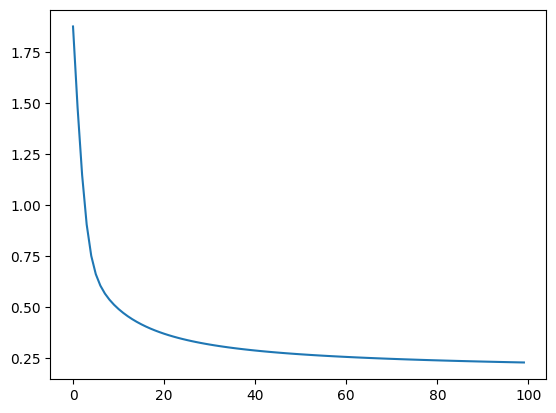

In [24]:
W,b=artificialNeuron(X,y)

On a une nouvelle observation notée nouvellePlante

In [15]:
nouvellePlante=np.array([2,1])

In [25]:
x0=np.linspace(-1,4,100)
x1=(-W[0]*x0-b)/W[1]

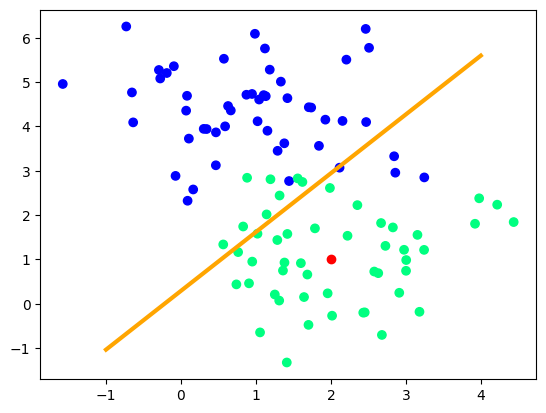

In [17]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.plot(x0,x1,c='orange',lw=3)
plt.scatter(nouvellePlante[0], nouvellePlante[1],c='r')
plt.show()

On prédit la classe de nouvellePlante en utilisant notre réseau de neurones

In [18]:
prediction(nouvellePlante, W,b)

[0.90787976]


array([ True])